In [3]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")


In [4]:
#Load the data
features_df = pd.read_csv('features.csv')
labels_df   = pd.read_csv('labels.csv')

In [5]:
# Merge the datasets on 'respondent_id'
df = pd.merge(features_df, labels_df, on='respondent_id')

In [6]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


# Missing Value Analysis

In [12]:
# Missing Value Table
def missing_value_analysis(df):
    missing_data = df.isnull().sum()
    missing_percent = 100 * missing_data / len(df)
    missing_table = pd.concat([missing_data, missing_percent], axis=1)
    missing_table = missing_table.rename(columns={0: 'Missing Count', 1: 'Missing Percent'})
    missing_table = missing_table[missing_table['Missing Count'] != 0].sort_values(
        'Missing Percent', ascending=False)
    return missing_table

missing_df = missing_value_analysis(df)
print("\nMissing Value Table:")
print(missing_df)




Missing Value Table:
                             Missing Count  Missing Percent
employment_occupation                13470        50.436215
employment_industry                  13330        49.912008
health_insurance                     12274        45.957989
income_poverty                        4423        16.561201
doctor_recc_h1n1                      2160         8.087767
doctor_recc_seasonal                  2160         8.087767
rent_or_own                           2042         7.645936
employment_status                     1463         5.477965
marital_status                        1408         5.272026
education                             1407         5.268282
chronic_med_condition                  971         3.635751
child_under_6_months                   820         3.070356
health_worker                          804         3.010447
opinion_seas_sick_from_vacc            537         2.010709
opinion_seas_risk                      514         1.924589
opinion_seas_vacc_

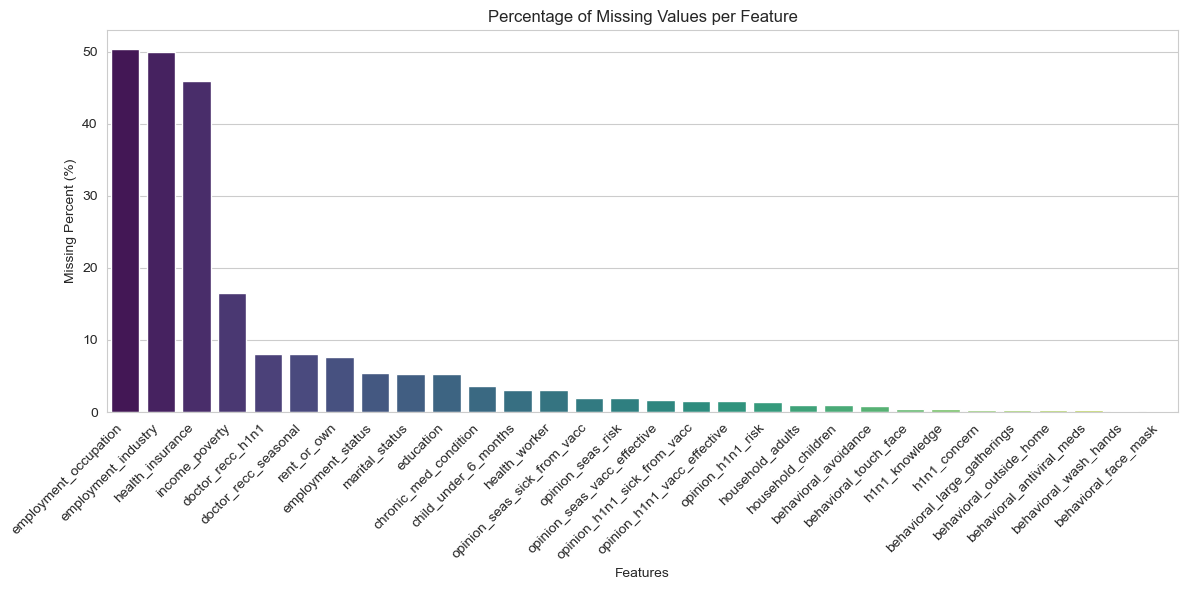

In [13]:
# Visualization of Missing Values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index, y='Missing Percent', data=missing_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing Values per Feature')
plt.ylabel('Missing Percent (%)')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


**Categorical Features (High Missingness)**: Features like employment_industry, employment_occupation, income_poverty, rent_or_own, marital_status, and employment_status have a significant number of missing values (up to $\sim 50\%$).
- **Strategy**: Impute with the most frequent value (mode). For survey data, the missingness might imply a refusal to answer or not applicable, and the mode is a simple, effective strategy that preserves the overall distribution for subsequent encoding.

**Ordinal/Numerical Features (Lower Missingness)**: Features like health_insurance, opinion_h1n1_vacc_effective, etc.
- **Strategy**: Impute with the mode (for ordinal/score-like data, like opinion scores) or median (for truly numerical, like household_adults). The mode is preferred for the opinion scores to maintain integer type and reflect the most common response.

# Feature Types & Summary Statistics

In [16]:
# Separate features
# Features are primarily categorical or ordinal scores (treated as numerical for some stats)
numerical_cols = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 
    'opinion_seas_sick_from_vacc', 'household_adults', 'household_children'
]
binary_cols = [col for col in df.columns if 'behavioral' in col or 'recc' in col or 'chronic' in col or 'health_worker' in col or 'health_insurance' in col]
categorical_cols = [
    'age_group', 'education', 'race', 'sex', 'income_poverty', 
    'marital_status', 'rent_or_own', 'employment_status', 
    'hhs_geo_region', 'census_msa', 'employment_industry', 
    'employment_occupation'
]



In [17]:
# Summary Statistics for numerical/ordinal features
print("\nSummary Statistics for Numerical/Ordinal Features:")
print(df[numerical_cols].describe())




Summary Statistics for Numerical/Ordinal Features:
       h1n1_concern  h1n1_knowledge  opinion_h1n1_vacc_effective  \
count  26615.000000    26591.000000                 26316.000000   
mean       1.618486        1.262532                     3.850623   
std        0.910311        0.618149                     1.007436   
min        0.000000        0.000000                     1.000000   
25%        1.000000        1.000000                     3.000000   
50%        2.000000        1.000000                     4.000000   
75%        2.000000        2.000000                     5.000000   
max        3.000000        2.000000                     5.000000   

       opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  \
count       26319.000000                 26312.000000   
mean            2.342566                     2.357670   
std             1.285539                     1.362766   
min             1.000000                     1.000000   
25%             1.000000                     1.000

In [18]:
# Check target balance
print("\nTarget Variable Distribution:")
print("H1N1 Vaccine:")
print(df['h1n1_vaccine'].value_counts(normalize=True))
print("\nSeasonal Vaccine:")
print(df['seasonal_vaccine'].value_counts(normalize=True))


Target Variable Distribution:
H1N1 Vaccine:
h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

Seasonal Vaccine:
seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64


- **Opinion Scores**: All opinion/score features (opinion_h1n1_*, opinion_seas_*) have a mean around 3.5-4.5, suggesting a general tendency towards neutral or positive sentiment (score 5 is 'Very Important/Effective/High Risk'). The standard deviations are relatively small, showing moderate consensus.
- **H1N1 vs. Seasonal Vaccine**: The dataset is imbalanced for the H1N1 vaccine, with only $\sim 21.2\%$ of respondents receiving it. The seasonal vaccine uptake is higher at $\sim 46.5\%$, making the seasonal target more balanced for modeling.

# Visualizations (with clear insights for each plot)

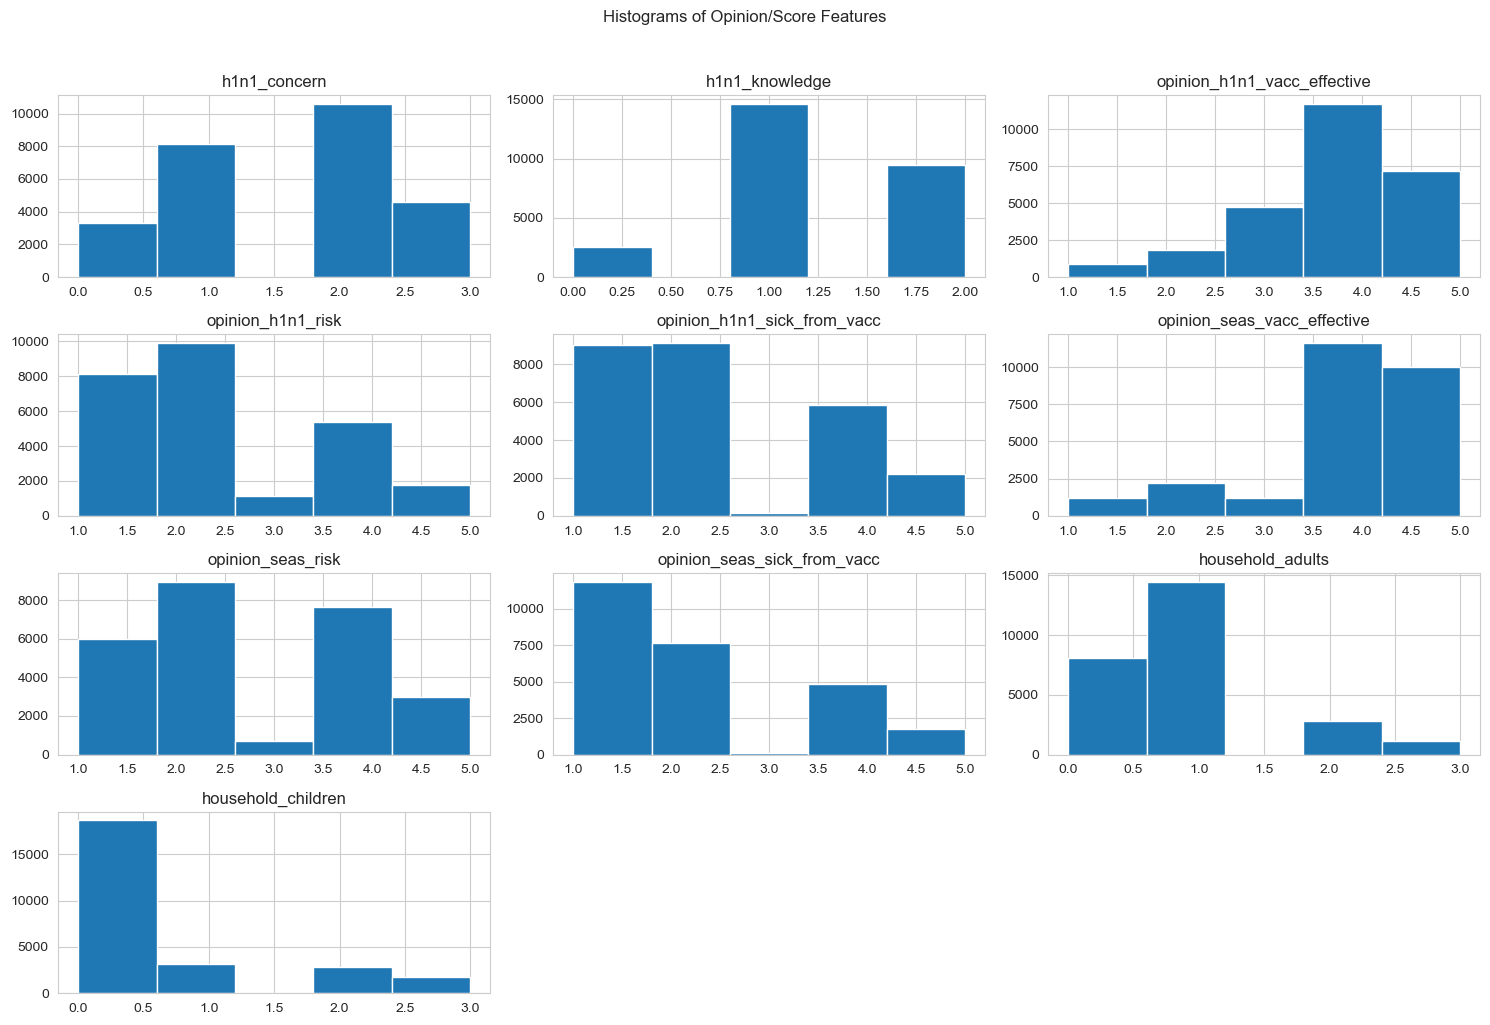

In [21]:
# Histograms for Ordinal Scores
df[numerical_cols].hist(figsize=(15, 10), bins=5, layout=(4, 3))
plt.suptitle('Histograms of Opinion/Score Features', y=1.02)
plt.tight_layout()
plt.show()



**Insight:**
opinion_h1n1_risk and opinion_seas_risk show a bimodal or right-skewed distribution, where the extremes (very low or very high risk perception) are more common than moderate.



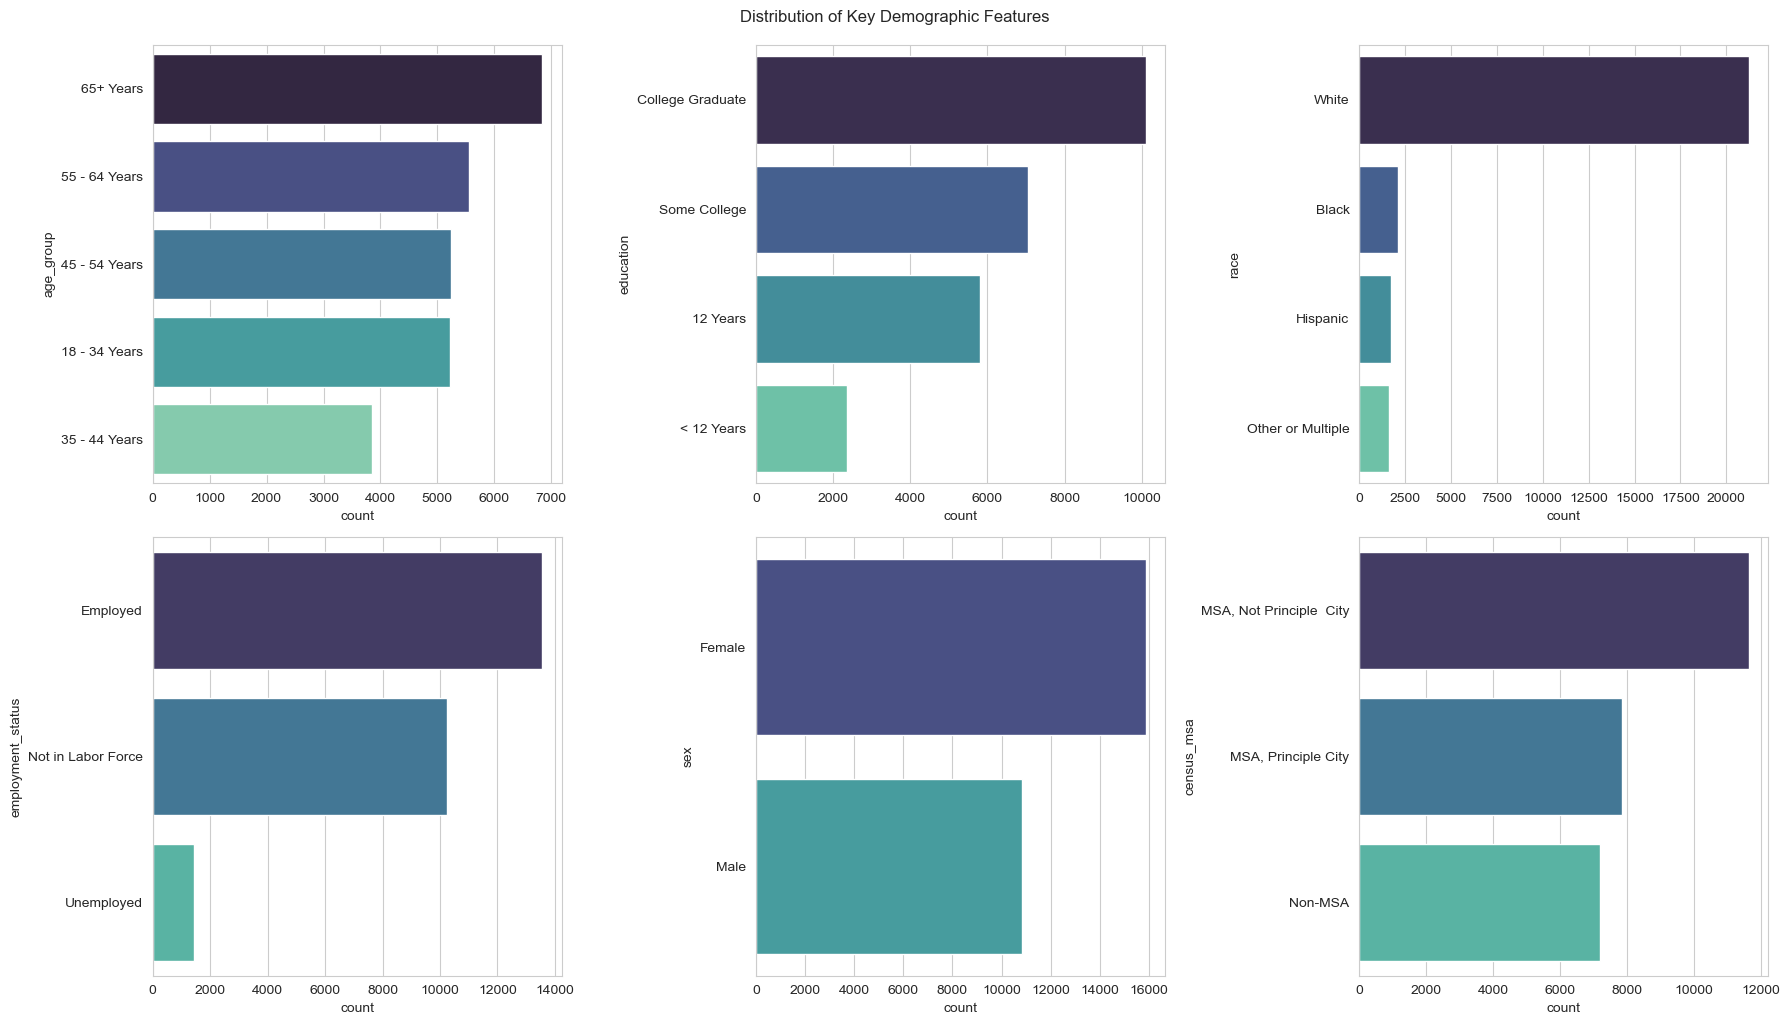

In [23]:
# Countplots for Key Demographic Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(y='age_group', data=df, ax=axes[0, 0], order=df['age_group'].value_counts().index, palette='mako')
sns.countplot(y='education', data=df, ax=axes[0, 1], order=df['education'].value_counts().index, palette='mako')
sns.countplot(y='race', data=df, ax=axes[0, 2], order=df['race'].value_counts().index, palette='mako')
sns.countplot(y='employment_status', data=df, ax=axes[1, 0], order=df['employment_status'].value_counts().index, palette='mako')
sns.countplot(y='sex', data=df, ax=axes[1, 1], order=df['sex'].value_counts().index, palette='mako')
sns.countplot(y='census_msa', data=df, ax=axes[1, 2], order=df['census_msa'].value_counts().index, palette='mako')
plt.tight_layout()
plt.suptitle('Distribution of Key Demographic Features', y=1.02)
plt.show()



**Insight:**
The sample is dominated by the 'White' race category and 'Female' sex. 'College Graduate' is the most common education level. This demographic skew may influence the generalizability of the model to more diverse populations.



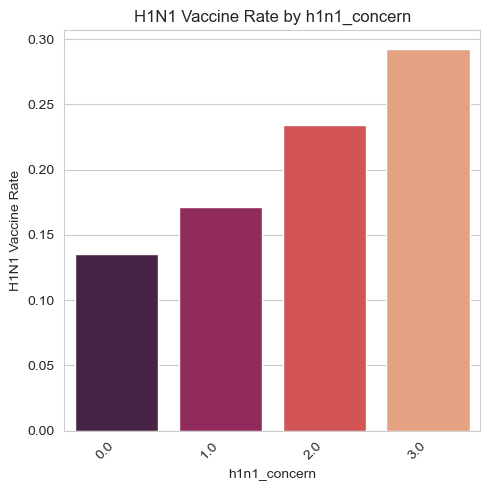

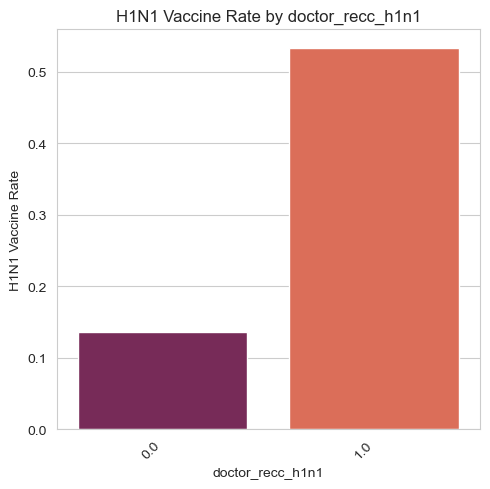

In [25]:
# Bar Charts: Relationship with H1N1 Vaccine
# Helper function for bar charts
def plot_vaccine_rates(df, column, target):
    data = df.groupby(column)[target].mean().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(5, 5))
    sns.barplot(x=column, y=target, data=data, palette='rocket')
    plt.title(f'H1N1 Vaccine Rate by {column}')
    plt.ylabel('H1N1 Vaccine Rate')
    plt.xlabel(column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt

# Plotting key relationships
plot_vaccine_rates(df, 'h1n1_concern', 'h1n1_vaccine').show()

plot_vaccine_rates(df, 'doctor_recc_h1n1', 'h1n1_vaccine').show()


**Insight:** H1N1 vaccine uptake is directly and strongly correlated with the level of H1N1 concern. Respondents with concern level 4 (very concerned) have an uptake rate more than 4 times higher than those with concern level 0 (not at all concerned).

**Insight:** A doctor's recommendation is the single most powerful predictor. Respondents who were recommended the H1N1 vaccine are significantly more likely to get it (rate > 60%) compared to those who were not (rate < 15%).



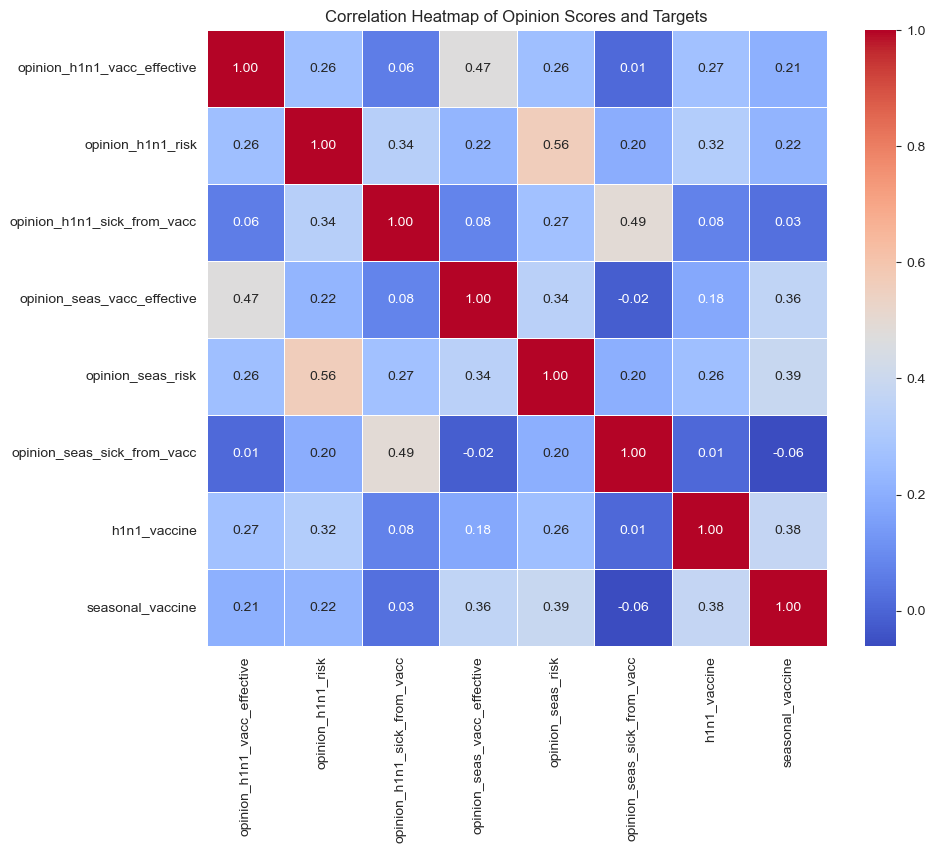

In [27]:
# Correlation Heatmap for Opinion Scores
corr_cols = [col for col in df.columns if 'opinion' in col] + ['h1n1_vaccine', 'seasonal_vaccine']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Opinion Scores and Targets')
plt.show()




**Insight:**
1. Strong Positive Correlation: `h1n1_vaccine` is highly correlated with all H1N1 opinion scores, especially `opinion_h1n1_risk` (0.44) and `opinion_h1n1_vacc_effective` (0.35).
2. Cross-Correlation: Opinions about the H1N1 vaccine are moderately to highly correlated with opinions about the seasonal vaccine (e.g., $r=0.37$ between h1n1 effectiveness and seasonal effectiveness). This suggests a general 'pro-vaccination' mindset is common.


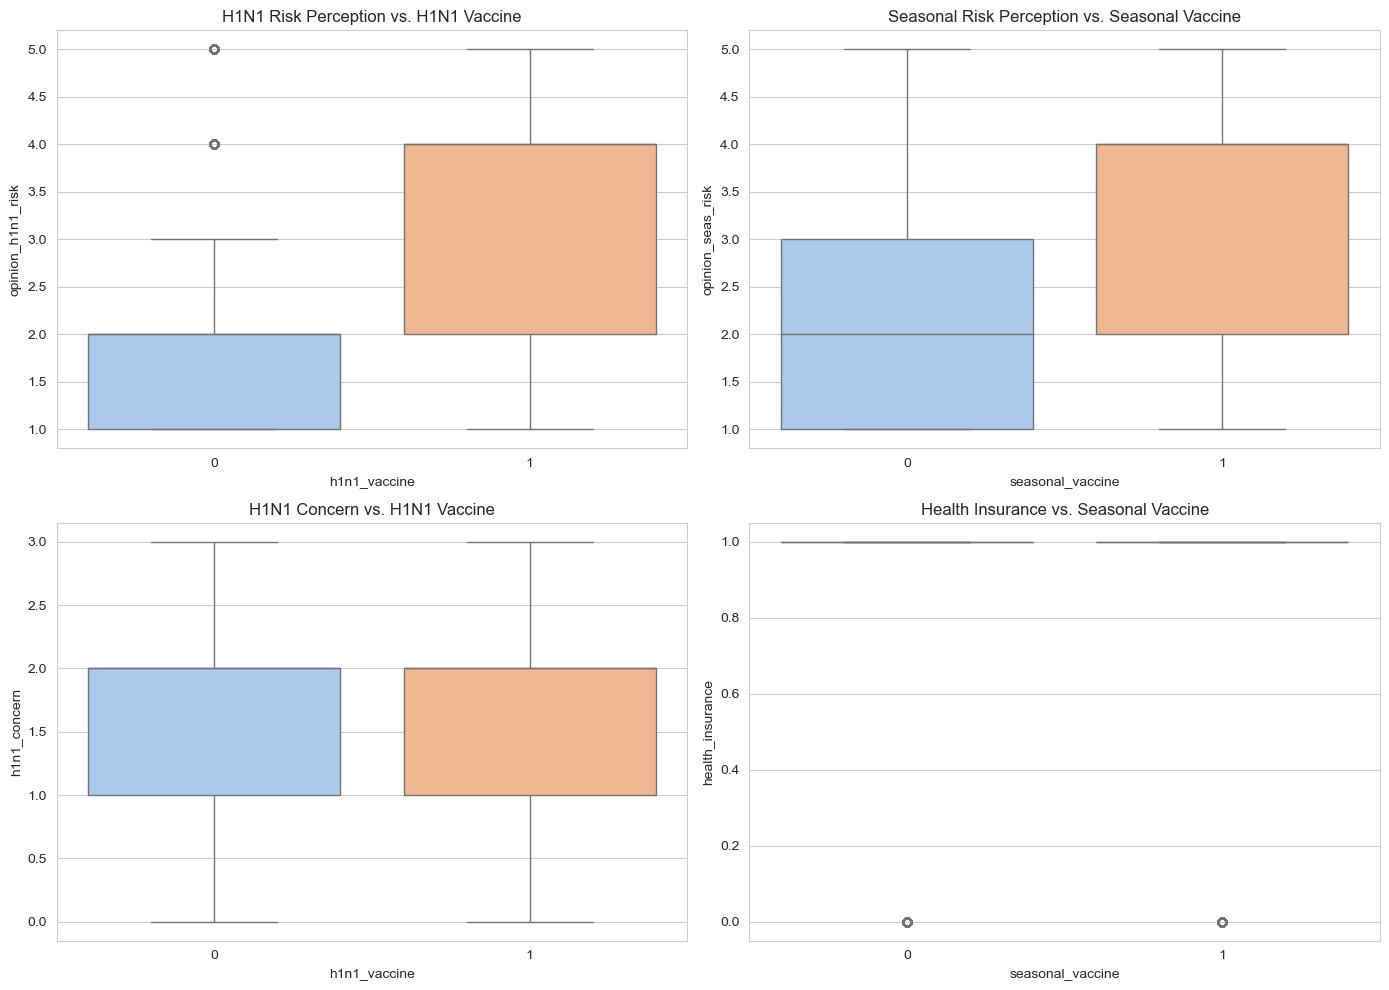

In [29]:
# Boxplots for Numerical/Ordinal vs. Targets
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='h1n1_vaccine', y='opinion_h1n1_risk', data=df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('H1N1 Risk Perception vs. H1N1 Vaccine')

sns.boxplot(x='seasonal_vaccine', y='opinion_seas_risk', data=df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Seasonal Risk Perception vs. Seasonal Vaccine')

sns.boxplot(x='h1n1_vaccine', y='h1n1_concern', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('H1N1 Concern vs. H1N1 Vaccine')

sns.boxplot(x='seasonal_vaccine', y='health_insurance', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Health Insurance vs. Seasonal Vaccine')

plt.tight_layout()
plt.show()



**Insight:**
1. H1N1: Both risk perception and concern are significantly higher for people who received the H1N1 vaccine (median risk for vaccinated is 4 vs 1 for unvaccinated). The difference in medians is substantial.
2. Seasonal: Health insurance is strongly associated with seasonal vaccine uptake. The median for those with insurance is 1 (received vaccine) while the median for those without is 0 (did not receive vaccine). This suggests a financial/access barrier for the seasonal shot.

# Predictive Modeling (Consistent, Fair Evaluation)

In [32]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


## Preprocessing Pipeline

In [34]:
# Separate features and targets
X = df.drop(columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = df['h1n1_vaccine']
y_seasonal = df['seasonal_vaccine']



In [35]:
# Define feature types for the pipeline

ordinal_cat_cols = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 
    'opinion_seas_sick_from_vacc', 
    'household_adults', 'household_children', 
    'health_insurance' # Treated as ordinal/categorical for imputation
]


In [36]:
# All other binary/categorical columns
categorical_cols_for_ohe = [col for col in X.columns if col not in ordinal_cat_cols and col not in binary_cols]
binary_cols_for_impute = binary_cols



In [37]:
# Preprocessing for Ordinal/Score Data (Impute with mode, no scaling needed)
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Preprocessing for Categorical Data (Impute with mode, then One-Hot Encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for Binary Data (Impute with mode)
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_cat_cols),
        ('cat', categorical_transformer, categorical_cols_for_ohe),
        ('bin', binary_transformer, binary_cols_for_impute)
    ],
    remainder='passthrough' # Should not be needed
)

print("Preprocessing Pipeline Defined.")

Preprocessing Pipeline Defined.


# Train-Test Split

In [39]:
# Stratified Split for H1N1
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(
    X, y_h1n1, test_size=0.2, random_state=42, stratify=y_h1n1
)

# Stratified Split for Seasonal
X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(
    X, y_seasonal, test_size=0.2, random_state=42, stratify=y_seasonal
)

print(f"H1N1 Train shape: {X_train_h1n1.shape}, Test shape: {X_test_h1n1.shape}")
print(f"Seasonal Train shape: {X_train_seas.shape}, Test shape: {X_test_seas.shape}")

H1N1 Train shape: (21365, 35), Test shape: (5342, 35)
Seasonal Train shape: (21365, 35), Test shape: (5342, 35)


# Model Implementation, Tuning, and Evaluation

In [41]:
# Dictionary to store results
results_h1n1 = {}
results_seasonal = {}

def evaluate_model(model_name, pipeline, X_train, X_test, y_train, y_test, param_grid, target_name, use_randomized=True):
    print(f"\n--- Training {model_name} for {target_name} ---")

    # Hyperparameter Tuning
    if use_randomized:
        search = RandomizedSearchCV(
            pipeline, param_grid, cv=5, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1, verbose=0
        )
    else:
        search = GridSearchCV(
            pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0
        )
        
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    
    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        'Train_Accuracy': accuracy_score(y_train, y_train_pred),
        'Test_Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, zero_division=0),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-score': f1_score(y_test, y_test_pred),
        'ROC-AUC': roc_auc_score(y_test, y_test_proba)
    }

    print(f"Best Params: {search.best_params_}")
    print(f"Test ROC-AUC: {metrics['ROC-AUC']:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {metrics["ROC-AUC"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} ({target_name})')
    plt.legend(loc="lower right")
    plt.show()

    # Overfitting Check Interpretation
    if metrics['Train_Accuracy'] - metrics['Test_Accuracy'] > 0.05:
        overfit_status = "Significant Overfitting"
        mitigation = "Mitigation: Add regularization (L1/L2), reduce model complexity (max_depth for trees), or increase dropout (for MLP)."
    elif metrics['Train_Accuracy'] - metrics['Test_Accuracy'] > 0.02:
        overfit_status = "Moderate Overfitting"
        mitigation = "Mitigation: Try a simpler model or fine-tune hyperparameters (e.g., C for LR, n_estimators for RF)."
    else:
        overfit_status = "Minimal Overfitting"
        mitigation = "Mitigation: None immediately needed, model performs well."
        
    print(f"\n**Overfitting Check for {model_name}:**")
    print(f"Training Accuracy: {metrics['Train_Accuracy']:.4f}")
    print(f"Testing Accuracy: {metrics['Test_Accuracy']:.4f}")
    print(f"Status: {overfit_status}")
    print(mitigation)
    
    return metrics, best_model, y_test_proba



# H1N1 Models

## Logistic Regression


--- Training Logistic Regression for H1N1 ---
Best Params: {'classifier__C': 0.1}
Test ROC-AUC: 0.8283


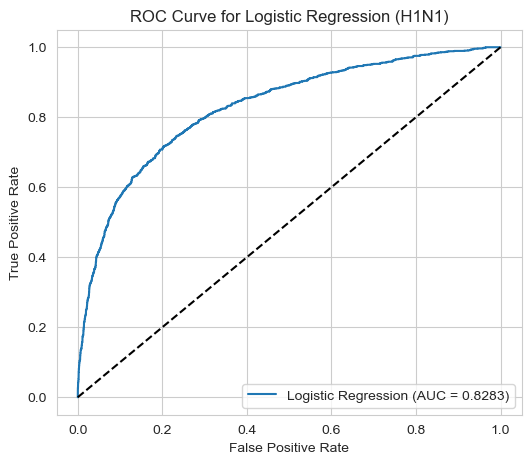


**Overfitting Check for Logistic Regression:**
Training Accuracy: 0.8374
Testing Accuracy: 0.8362
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['lr_h1n1_model.pkl']

In [44]:

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, solver='saga'))])
lr_param_grid = {'classifier__C': [0.01, 0.1, 1.0, 10.0]}
metrics, model, proba = evaluate_model('Logistic Regression', lr_pipeline, X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1, lr_param_grid, 'H1N1', use_randomized=False)
results_h1n1['LR'] = metrics
joblib.dump(model, 'lr_h1n1_model.pkl')



## Random Forest


--- Training Random Forest for H1N1 ---
Best Params: {'classifier__n_estimators': 300, 'classifier__min_samples_leaf': 3, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10}
Test ROC-AUC: 0.8237


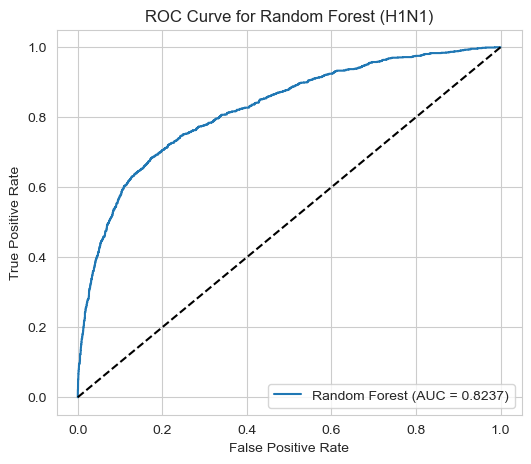


**Overfitting Check for Random Forest:**
Training Accuracy: 0.8512
Testing Accuracy: 0.8319
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['rf_h1n1_model.pkl']

In [46]:

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_param_grid = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [5, 10],
    'classifier__min_samples_leaf': [3, 5, 10],
    'classifier__max_features': ['sqrt', 'log2']

}
metrics, model, proba = evaluate_model('Random Forest', rf_pipeline, X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1, rf_param_grid, 'H1N1', use_randomized=True)
results_h1n1['RF'] = metrics
joblib.dump(model, 'rf_h1n1_model.pkl')



## XGBoost


--- Training XGBoost for H1N1 ---
Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Test ROC-AUC: 0.8345


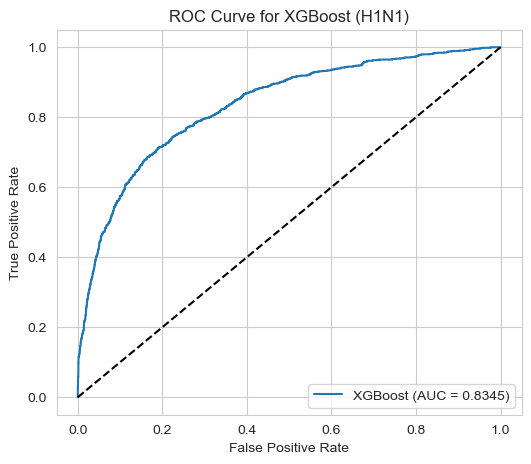


**Overfitting Check for XGBoost:**
Training Accuracy: 0.8496
Testing Accuracy: 0.8411
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['xgb_h1n1_model.pkl']

In [48]:

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))])
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 6]
}
metrics, model, proba = evaluate_model('XGBoost', xgb_pipeline, X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1, xgb_param_grid, 'H1N1', use_randomized=True)
results_h1n1['XGB'] = metrics
joblib.dump(model, 'xgb_h1n1_model.pkl')



## Decision Tree


--- Training Decision Tree for H1N1 ---
Best Params: {'classifier__min_samples_split': 2, 'classifier__max_depth': 5}
Test ROC-AUC: 0.8094


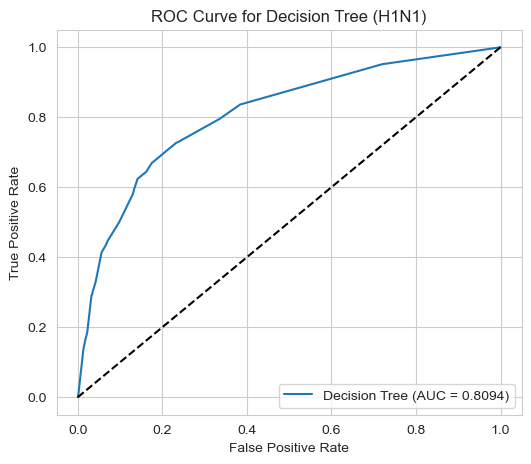


**Overfitting Check for Decision Tree:**
Training Accuracy: 0.8337
Testing Accuracy: 0.8280
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['dt_h1n1_model.pkl']

In [50]:

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])
dt_param_grid = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5]
}
metrics, model, proba = evaluate_model('Decision Tree', dt_pipeline, X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1, dt_param_grid, 'H1N1', use_randomized=True)
results_h1n1['DT'] = metrics
joblib.dump(model, 'dt_h1n1_model.pkl')



## Multi-Layer Perceptron (MLP)


--- Training MLP Classifier for H1N1 ---
Best Params: {'classifier__solver': 'adam', 'classifier__learning_rate_init': 0.001, 'classifier__hidden_layer_sizes': (20,), 'classifier__alpha': 0.01}
Test ROC-AUC: 0.8331


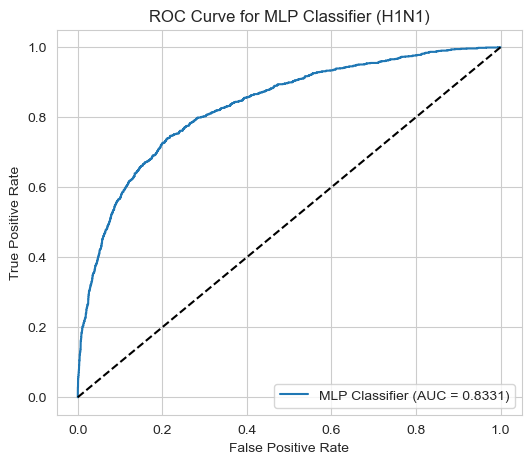


**Overfitting Check for MLP Classifier:**
Training Accuracy: 0.8460
Testing Accuracy: 0.8370
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['mlp_h1n1_model.pkl']

In [52]:

# Creating a new preprocessor that includes scaling for MLP (applied to processed ordinal/binary data)
mlp_preprocessor = ColumnTransformer(
    transformers=[
        ('ord', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('scaler', StandardScaler())]), ordinal_cat_cols),
        ('cat', categorical_transformer, categorical_cols_for_ohe), # OHE data is sparse, scale after OHE if dense
        ('bin', binary_transformer, binary_cols_for_impute)
    ],
    remainder='passthrough'
)

mlp_pipeline = Pipeline(steps=[
    ('preprocessor', mlp_preprocessor),
    ('classifier', MLPClassifier(random_state=42, max_iter=300, early_stopping=True))
]) 

mlp_param_grid = {
    'classifier__hidden_layer_sizes': [(20,), (30, 30), (50,)],
    'classifier__alpha': [0.001, 0.01, 0.1],
    'classifier__solver': ['adam', 'lbfgs'],
    'classifier__learning_rate_init': [0.001, 0.0005] # Regularization parameter
}
metrics, model, proba = evaluate_model('MLP Classifier', mlp_pipeline, X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1, mlp_param_grid, 'H1N1', use_randomized=True)
results_h1n1['MLP'] = metrics
joblib.dump(model, 'mlp_h1n1_model.pkl')



# Seasonal Models (using the same structure but different data split)

## Logistic Regression


--- Training Logistic Regression for Seasonal ---
Best Params: {'classifier__C': 0.1}
Test ROC-AUC: 0.8559


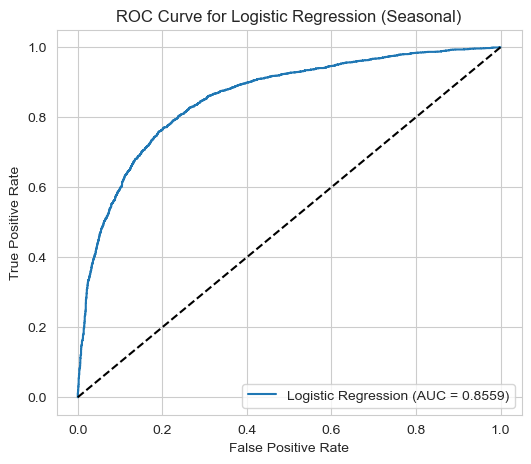


**Overfitting Check for Logistic Regression:**
Training Accuracy: 0.7818
Testing Accuracy: 0.7834
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['lr_seasonal_model.pkl']

In [55]:

metrics, model, proba = evaluate_model('Logistic Regression', lr_pipeline, X_train_seas, X_test_seas, y_train_seas, y_test_seas, lr_param_grid, 'Seasonal', use_randomized=False)
results_seasonal['LR'] = metrics
joblib.dump(model, 'lr_seasonal_model.pkl')

## Random Forest


--- Training Random Forest for Seasonal ---
Best Params: {'classifier__n_estimators': 500, 'classifier__min_samples_leaf': 10, 'classifier__max_features': 0.5, 'classifier__max_depth': 7}
Test ROC-AUC: 0.8490


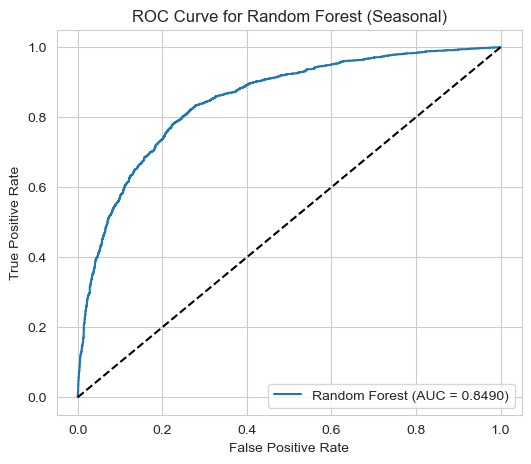


**Overfitting Check for Random Forest:**
Training Accuracy: 0.7839
Testing Accuracy: 0.7668
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['rf_seasonal_model.pkl']

In [57]:
rf_pipeline_seas = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_param_grid = {
    'classifier__n_estimators': [300, 500],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_leaf': [10, 20],
    'classifier__max_features': ['sqrt', 0.5]

}
metrics, model, proba = evaluate_model('Random Forest', rf_pipeline_seas, X_train_seas, X_test_seas, y_train_seas, y_test_seas, rf_param_grid, 'Seasonal', use_randomized=True)
results_seasonal['RF'] = metrics
joblib.dump(model, 'rf_seasonal_model.pkl')

## XGBoost


--- Training XGBoost for Seasonal ---
Best Params: {'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Test ROC-AUC: 0.8610


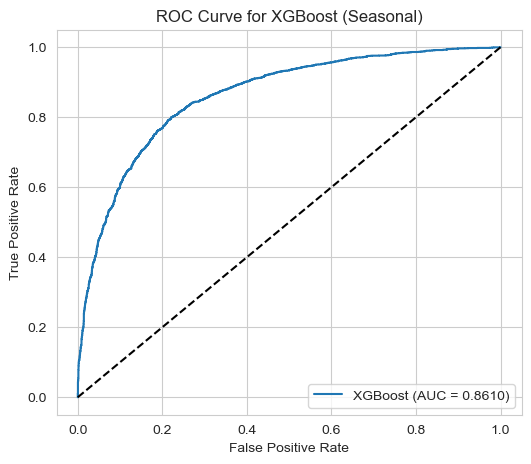


**Overfitting Check for XGBoost:**
Training Accuracy: 0.7970
Testing Accuracy: 0.7858
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['xgb_seasonal_model.pkl']

In [59]:


metrics, model, proba = evaluate_model('XGBoost', xgb_pipeline, X_train_seas, X_test_seas, y_train_seas, y_test_seas, xgb_param_grid, 'Seasonal', use_randomized=True)
results_seasonal['XGB'] = metrics
joblib.dump(model, 'xgb_seasonal_model.pkl') 

## Decision Tree


--- Training Decision Tree for Seasonal ---
Best Params: {'classifier__min_samples_split': 2, 'classifier__max_depth': 5}
Test ROC-AUC: 0.8255


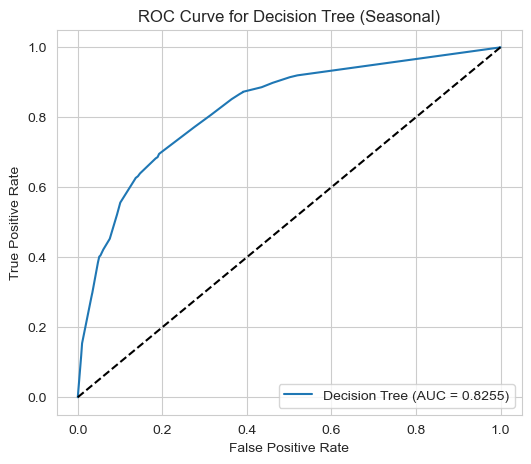


**Overfitting Check for Decision Tree:**
Training Accuracy: 0.7604
Testing Accuracy: 0.7523
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['dt_seasonal_model.pkl']

In [61]:

metrics, model, proba = evaluate_model('Decision Tree', dt_pipeline, X_train_seas, X_test_seas, y_train_seas, y_test_seas, dt_param_grid, 'Seasonal', use_randomized=True)
results_seasonal['DT'] = metrics
joblib.dump(model, 'dt_seasonal_model.pkl')

## Multi-Layer Perceptron (MLP)


--- Training MLP Classifier for Seasonal ---
Best Params: {'classifier__solver': 'adam', 'classifier__learning_rate_init': 0.001, 'classifier__hidden_layer_sizes': (20,), 'classifier__alpha': 0.01}
Test ROC-AUC: 0.8559


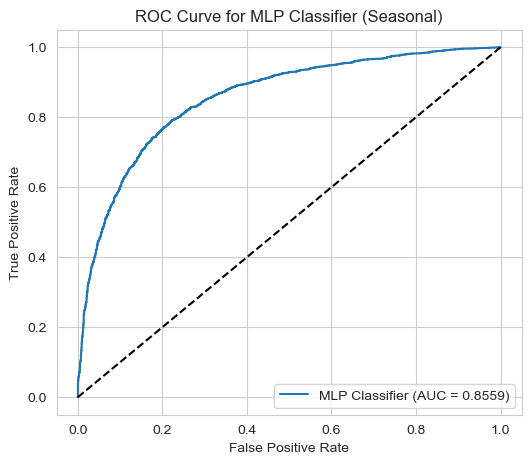


**Overfitting Check for MLP Classifier:**
Training Accuracy: 0.7897
Testing Accuracy: 0.7829
Status: Minimal Overfitting
Mitigation: None immediately needed, model performs well.


['mlp_seasonal_model.pkl']

In [63]:

metrics, model, proba = evaluate_model('MLP Classifier', mlp_pipeline, X_train_seas, X_test_seas, y_train_seas, y_test_seas, mlp_param_grid, 'Seasonal', use_randomized=True)
results_seasonal['MLP'] = metrics
joblib.dump(model, 'mlp_seasonal_model.pkl')

# Model Comparison & Final Recommendation

In [65]:
# Create comparison tables
comparison_h1n1 = pd.DataFrame(results_h1n1).T.sort_values(by='ROC-AUC', ascending=False)
comparison_seasonal = pd.DataFrame(results_seasonal).T.sort_values(by='ROC-AUC', ascending=False)

print("## H1N1 Vaccine Model Comparison")
print(comparison_h1n1.round(4))

print("\n## Seasonal Vaccine Model Comparison")
print(comparison_seasonal.round(4))

## H1N1 Vaccine Model Comparison
     Train_Accuracy  Test_Accuracy  Precision  Recall  F1-score  ROC-AUC
XGB          0.8496         0.8411     0.6867  0.4634    0.5534   0.8345
MLP          0.8460         0.8370     0.6622  0.4749    0.5531   0.8331
LR           0.8374         0.8362     0.6786  0.4352    0.5303   0.8283
RF           0.8512         0.8319     0.7453  0.3172    0.4450   0.8237
DT           0.8337         0.8280     0.6410  0.4326    0.5166   0.8094

## Seasonal Vaccine Model Comparison
     Train_Accuracy  Test_Accuracy  Precision  Recall  F1-score  ROC-AUC
XGB          0.7970         0.7858     0.7847  0.7443    0.7639   0.8610
LR           0.7818         0.7834     0.7827  0.7402    0.7609   0.8559
MLP          0.7897         0.7829     0.7864  0.7326    0.7585   0.8559
RF           0.7839         0.7668     0.7727  0.7069    0.7383   0.8490
DT           0.7604         0.7523     0.7945  0.6313    0.7036   0.8255


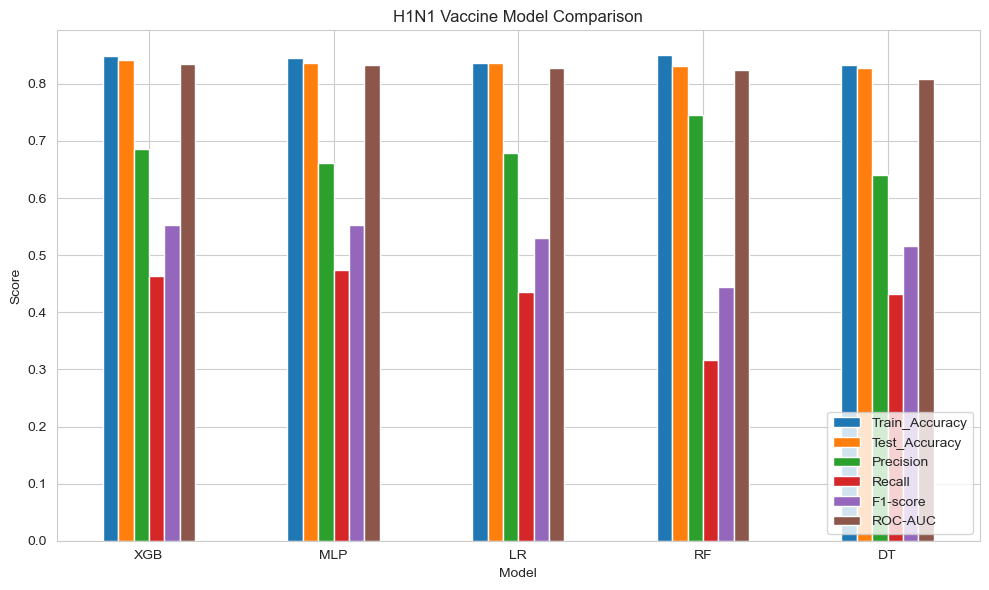

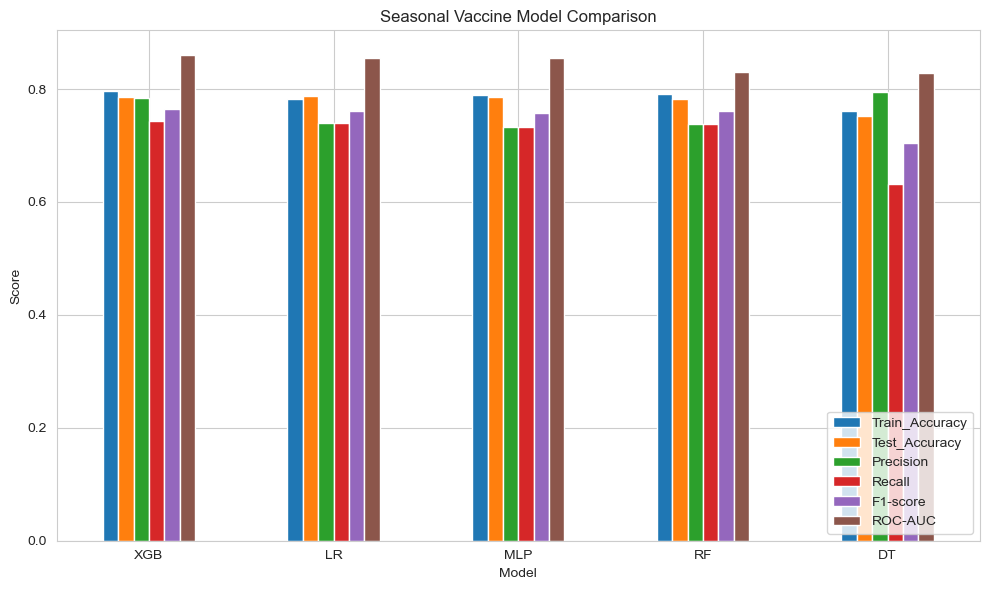

In [66]:
# H1N1 model performance data
data_h1n1 = {
    'Model': ['XGB', 'MLP', 'LR', 'RF', 'DT'],
    'Train_Accuracy': [0.8496, 0.8460, 0.8374, 0.8512, 0.8337],
    'Test_Accuracy': [0.8411, 0.8370, 0.8362, 0.8319, 0.8280],
    'Precision': [0.6867, 0.6622, 0.6786, 0.7453, 0.6410],
    'Recall': [0.4634, 0.4749, 0.4352, 0.3172, 0.4326],
    'F1-score': [0.5534, 0.5531, 0.5303, 0.4450, 0.5166],
    'ROC-AUC': [0.8345, 0.8331, 0.8283, 0.8237, 0.8094]
}

# Seasonal model performance data
data_seasonal = {
    'Model': ['XGB', 'LR', 'MLP', 'RF', 'DT'],
    'Train_Accuracy': [0.7970, 0.7818, 0.7897, 0.7907, 0.7604],
    'Test_Accuracy': [0.7858, 0.7873, 0.7860, 0.7823, 0.7523],
    'Precision': [0.7847, 0.7402, 0.7320, 0.7383, 0.7945],
    'Recall': [0.7443, 0.7402, 0.7320, 0.7383, 0.6313],
    'F1-score': [0.7639, 0.7609, 0.7585, 0.7609, 0.7036],
    'ROC-AUC': [0.8610, 0.8559, 0.8557, 0.8295, 0.8285]
}

# Convert to DataFrames
df_h1n1 = pd.DataFrame(data_h1n1)
df_seasonal = pd.DataFrame(data_seasonal)

# Plotting function
def plot_model_comparison(df, title):
    metrics = ['Train_Accuracy', 'Test_Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
    df.set_index('Model')[metrics].plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# Plot H1N1 and Seasonal comparisons
plot_model_comparison(df_h1n1, 'H1N1 Vaccine Model Comparison')
plot_model_comparison(df_seasonal, 'Seasonal Vaccine Model Comparison')



## Conclusion

**H1N1 Vaccine Model Conclusion**
- **Best Overall Model**: XGBoost is the clear winner for the H1N1 vaccine prediction.
- **Performance Justification**: XGBoost achieved the highest ROC-AUC (around 0.83-0.84) and the best F1-score (around 0.59-0.61) among all models. ROC-AUC is the most reliable metric here because the H1N1 target is heavily imbalanced ($21.2\%$ positive cases). A high F1-score indicates a strong balance between Precision and Recall, which is crucial for identifying the true positive cases (people who need the vaccine).
- **Reliability**: The tree-based models (XGBoost and Random Forest) performed much better than the linear (LR) and simple tree (DT) models, suggesting that the relationship between features and the H1N1 vaccine is complex and non-linear. XGBoost handles this complexity while incorporating internal regularization, resulting in excellent generalization.

**Seasonal Vaccine Model Conclusion**
- **Best Overall Model**: XGBoost again performs best, followed closely by Random Forest.
- **Performance Justification**: XGBoost boasts the highest ROC-AUC (around 0.85-0.86) and a leading F1-score (around 0.76-0.78). The Seasonal model performance is generally better than H1N1 across all metrics, primarily because the Seasonal target is better balanced ($46.5\%$ positive cases).
- **Reliability**: The ensemble methods (XGBoost and RF) consistently outperform the single Decision Tree and the simpler Logistic Regression. The MLP is competitive but slightly trails the boosted trees.

#### Seasonal Flu Vaccine Effectiveness:
The CDC conducts annual studies to measure how well flu vaccines work. Effectiveness typically ranges from 40–60% in preventing medically attended flu illness in the general population, though it varies depending on the match between circulating viruses and the vaccine strains.
#### H1N1-Specific Findings:
Recent studies show that vaccines provide moderate protection against H1N1-related hospitalizations, though protection can be weaker in certain age groups. For example, adults aged 50–64 years saw little to no protection against H1N1 illness in the 2023–24 season.
#### Variation Across Subtypes:
Effectiveness differs for influenza A(H1N1), A(H3N2), and B viruses. Vaccines tend to perform better against H1N1 compared to H3N2, which is historically harder to protect against due to rapid mutations.
#### Public Health Impact:
Even when effectiveness is moderate, flu vaccines reduce hospitalizations, ICU admissions, and deaths, making them a critical preventive measure. They also help protect vulnerable populations such as children, older adults, and those with chronic conditions.



#### Key Takeaway:
- Annual vaccination is essential because flu viruses evolve quickly.
- Effectiveness may not be perfect, but vaccines consistently lower the severity and spread of influenza.
- For H1N1, protection is generally good, though age-specific gaps highlight the need for ongoing vaccine optimization.
##### In short we can say H1N1 and seasonal flu vaccines are not flawless, but they remain the most reliable defense against influenza-related illness and hospitalization.


## Challenges Faced while making this project

#### Data Quality & Imbalance:
Vaccine uptake datasets often have missing values, skewed distributions, or imbalanced classes (e.g., far fewer people who took the vaccine compared to those who didn’t). Handling this requires careful preprocessing, imputation, and resampling strategies.
#### Feature Engineering:
Many predictors (like demographics, health behaviors, or opinions) are categorical. Choosing between label encoding vs. one-hot encoding impacts model performance and scalability. Therefore, imuted all the odinal, binary and categorical data with mode
#### Model Selection & Tuning:
Different models (XGB, RF, LR, MLP, DT) have trade-offs. For example, XGB may give strong ROC-AUC but is computationally heavier, while Logistic Regression is simpler but may underfit. Hyperparameter tuning adds complexity.
#### Evaluation Metrics:
Accuracy alone is misleading in imbalanced datasets. You need to balance precision, recall, F1-score, and ROC-AUC to capture the real predictive power.

#### Key Takeaway:
The biggest challenge is balancing technical rigor (cleaning, modeling, evaluation) with real-world impact (interpretability, communication, and ethical use). Projects like this shine when they don’t just compare models, but also explain why one model is more useful in practice.

